In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

# 回帰の基礎

## 確定的トレンド

確定的トレンドを単純パーセプトロンで分析します。


In [177]:
'''
kerasによる線形回帰
'''
# Training Data
x=np.arange(1,16)
print('オリジナルデータ')
print(x)
xpoints=x

オリジナルデータ
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [180]:
'''
データ作成
'''
# Training Data
train_X=xpoints[:-1]
train_y=xpoints[1:]
train_X,train_y

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]))

In [181]:
'''
モデル設定

'''
model = Sequential()
model.add(Dense(input_dim=1,kernel_initializer='uniform',activation='linear',units=1))

model.compile(loss='mse', optimizer='rmsprop')

In [182]:
'''
データの学習
'''
model.fit(
    train_X,
    train_y,
    batch_size=1,
    epochs=100,
    verbose=0)

重み [[0.98312396]] バイアス [1.1504095]


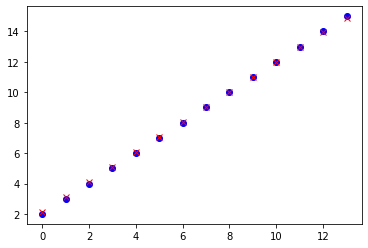

In [183]:
'''
結果出力
'''
w=model.get_weights()[0]
b=model.get_weights()[1]
Y_hat=w[0]*train_X+b
print('重み',model.layers[0].get_weights()[0],'バイアス',model.layers[0].get_weights()[1])
plt.plot(train_y,'bo')
plt.plot(Y_hat, 'rx')

In [11]:
from sklearn.metrics import mean_squared_error
def evaluation(X_train,y_train,X_test,y_test,model):
    y_train0=y_train[:-1]
    y_train00=y_train[1:]
    y_test0=y_test[:-1]
    y_test00=y_test[1:]
    y_hat_train = model.predict(X_train, batch_size=1)
    y_hat_test = model.predict(X_test, batch_size=1)
    print('訓練データ誤差',mean_squared_error(y_train0, y_train00, multioutput='raw_values'))
    print('訓練データ予測誤差',mean_squared_error(y_hat_train, y_train, multioutput='raw_values'))
    print('テストデータ誤差',mean_squared_error(y_test0, y_test00, multioutput='raw_values'))
    print('テストデータ予測誤差',mean_squared_error(y_hat_test, y_test, multioutput='raw_values'))

evaluation(train_X,train_y,train_X,train_y,model=model)

訓練データ誤差 [1.]
訓練データ予測誤差 [1.0123243]
テストデータ誤差 [1.]
テストデータ予測誤差 [1.0123243]


# トレンドが変化したら？

In [185]:
xx=np.arange(14,1,-1)
xxx=np.concatenate((xpoints,xx),axis=None)
xpoints=xxx
xpoints

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 14, 13,
       12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2])

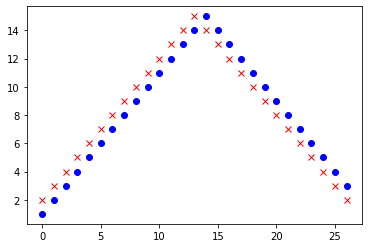

In [186]:
'''
データ作成
'''
# Training Data
train_X=xpoints[:-1]
train_y=xpoints[1:]
train_X,train_y
plt.plot(train_X,'bo')
plt.plot(train_y, 'rx')

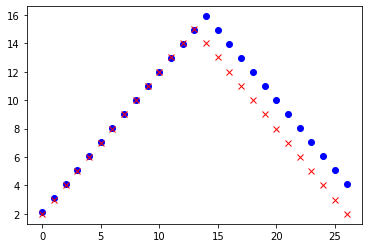

In [188]:
'''
データ作成
'''
# Training Data
pred=model.predict(train_X)
train_y=xpoints[1:]
plt.plot(pred,'bo')
plt.plot(train_y, 'rx')

In [189]:
evaluation(train_X,train_y,train_X,train_y,model=model)

訓練データ誤差 [1.]
訓練データ予測誤差 [1.92770079]
テストデータ誤差 [1.]
テストデータ予測誤差 [1.92770079]


In [6]:
'''
モデル設定

'''
model = Sequential()
model.add(Dense(input_dim=1,kernel_initializer='uniform',activation='linear',units=1))

model.compile(loss='mse', optimizer='rmsprop')

In [7]:
'''
データの学習
'''
model.fit(
    train_X,
    train_y,
    batch_size=1,
    epochs=100,
    verbose=0)

重み [[0.8983631]] バイアス [0.9315995]


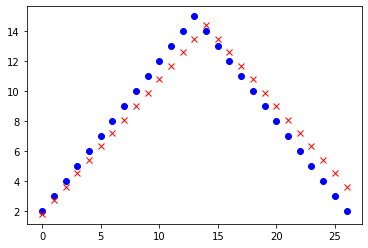

In [8]:
'''
結果出力
'''
w=model.get_weights()[0]
b=model.get_weights()[1]
Y_hat=w[0]*train_X+b
print('重み',model.layers[0].get_weights()[0],'バイアス',model.layers[0].get_weights()[1])
plt.plot(train_y,'bo')
plt.plot(Y_hat, 'rx')

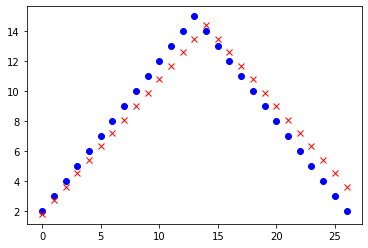

In [9]:
#predictメソッドの利用
pred=model.predict(train_X)
plt.plot(train_y,'bo')
plt.plot(pred,'rx')

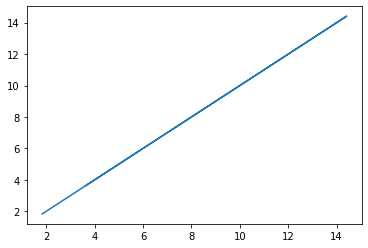

In [10]:
plt.plot(Y_hat, pred)

In [11]:
from sklearn.metrics import mean_squared_error
def evaluation(X_train,y_train,X_test,y_test,model):
    y_train0=y_train[:-1]
    y_train00=y_train[1:]
    y_test0=y_test[:-1]
    y_test00=y_test[1:]
    y_hat_train = model.predict(X_train, batch_size=1)
    y_hat_test = model.predict(X_test, batch_size=1)
    print('訓練データ誤差',mean_squared_error(y_train0, y_train00, multioutput='raw_values'))
    print('訓練データ予測誤差',mean_squared_error(y_hat_train, y_train, multioutput='raw_values'))
    print('テストデータ誤差',mean_squared_error(y_test0, y_test00, multioutput='raw_values'))
    print('テストデータ予測誤差',mean_squared_error(y_hat_test, y_test, multioutput='raw_values'))

evaluation(train_X,train_y,train_X,train_y,model=model)

訓練データ誤差 [1.]
訓練データ予測誤差 [1.0123243]
テストデータ誤差 [1.]
テストデータ予測誤差 [1.0123243]


### データの構造を変えてみよう

5つのデータを用いて予測をします。

入力データの構造の変化に注目してください。

In [12]:
X=[]
for i in range(len(xpoints)-3):
    X.append(xpoints[i:i+3])
train_X=np.asarray(X)
train_y = xpoints[3:]
print()
print('train_X')
print(train_X)
print('train_y')
print(train_y)


train_X
[[ 1  2  3]
 [ 2  3  4]
 [ 3  4  5]
 [ 4  5  6]
 [ 5  6  7]
 [ 6  7  8]
 [ 7  8  9]
 [ 8  9 10]
 [ 9 10 11]
 [10 11 12]
 [11 12 13]
 [12 13 14]
 [13 14 15]
 [14 15 14]
 [15 14 13]
 [14 13 12]
 [13 12 11]
 [12 11 10]
 [11 10  9]
 [10  9  8]
 [ 9  8  7]
 [ 8  7  6]
 [ 7  6  5]
 [ 6  5  4]
 [ 5  4  3]]
train_y
[ 4  5  6  7  8  9 10 11 12 13 14 15 14 13 12 11 10  9  8  7  6  5  4  3
  2]


- 入力の次元を変更しています。

In [13]:
model = Sequential([
    Dense(input_dim=3, units=1,kernel_initializer='uniform',activation='linear')
])

model.compile(loss='mse', optimizer='rmsprop')

model.fit(
    train_X,
    train_y,
    batch_size=1,
    epochs=1000,
    verbose=0)
reg=model.predict(train_X,batch_size=1)
print('重み')
print(model.layers[0].get_weights()[0])
print('バイアス')
print(model.layers[0].get_weights()[1])

重み
[[-0.61299604]
 [ 0.2514203 ]
 [ 1.3196052 ]]
バイアス
[0.26187727]


訓練データ誤差 [1.]
訓練データ予測誤差 [0.16336821]
テストデータ誤差 [1.]
テストデータ予測誤差 [0.16336821]


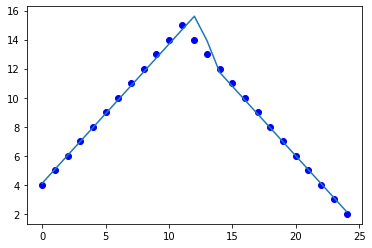

In [14]:
pred=model.predict(train_X)
plt.plot(train_y,'bo')
plt.plot(pred)
evaluation(train_X,train_y,train_X,train_y,model=model)

## 正弦波

確定的トレンドを正弦波に変えてみましょう。

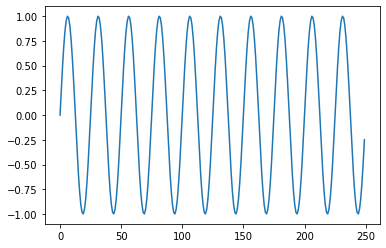

In [15]:
def sin_wave(p0=1,n=250,k=10,A=1):#k:
    x = np.arange(0, n )
    return (A*np.sin(2.0 * np.pi * x / n*k))

tsd=pd.Series(sin_wave())
plt.plot(tsd)

In [16]:
# 入力特徴量の作成
tsd_data=tsd.iloc[:-1]
# 出力特徴量の作成　
tsd_target=tsd.iloc[1:]
print(tsd_data[:5])
print(tsd_target[:5])
# データがずれているのを確認

0    0.000000
1    0.248690
2    0.481754
3    0.684547
4    0.844328
dtype: float64
1    0.248690
2    0.481754
3    0.684547
4    0.844328
5    0.951057
dtype: float64


In [141]:
# 訓練データとテストデータの作成

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tsd_data.values, tsd_target.values,shuffle=False)

((186, 1), (186, 1), (63, 1), (63, 1))

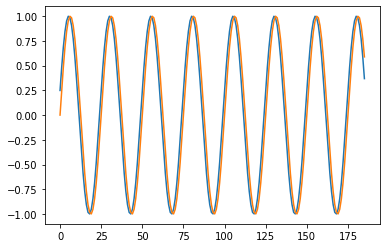

In [142]:
X_train=X_train[:,np.newaxis]
y_train=y_train[:,np.newaxis]
X_test=X_test[:,np.newaxis]
y_test=y_test[:,np.newaxis]
plt.plot(y_train)
plt.plot(X_train)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

In [143]:
# データの構造の確認
print("訓練データ　X")
print(X_train[:5])
print("テストデータ　y")
print(y_train[:5])

訓練データ　X
[[0.        ]
 [0.24868989]
 [0.48175367]
 [0.68454711]
 [0.84432793]]
テストデータ　y
[[0.24868989]
 [0.48175367]
 [0.68454711]
 [0.84432793]
 [0.95105652]]


In [146]:
np.random.seed(0)  # 乱数シード

'''
モデル設定
'''
model = Sequential([
    Dense(input_dim=1, units=1,activation='linear'),  
    #Dense(units=2,activation='relu'),  
    #Dense(units=1,activation='linear')  # 出力層の活性化関数は恒等関数(linear)
])

model.compile(loss='mse', optimizer='rmsprop')
epochs=100

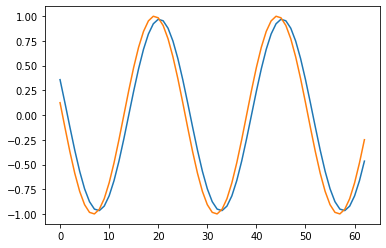

In [147]:
'''
モデル学習
'''
results=model.fit(X_train, y_train, epochs=epochs, batch_size=10,verbose=0, validation_data=(X_test, y_test))  # Keras 1

'''
学習結果の確認
    予測にはpredictを用いていることに注意。
'''
pred = model.predict(X_test, batch_size=1)
plt.plot(pred)
plt.plot(y_test)
#plt.plot(X_test)

In [148]:
print('第一層')
print(model.layers[0].get_weights()[0])
print('バイアス')
print(model.layers[0].get_weights()[1])
print('----')
print('第2層')
print(model.layers[1].get_weights()[0])
print('バイアス')
print(model.layers[1].get_weights()[1])

第一層
[[0.9678585]]
バイアス
[0.00136721]
----
第2層


IndexError: list index out of range

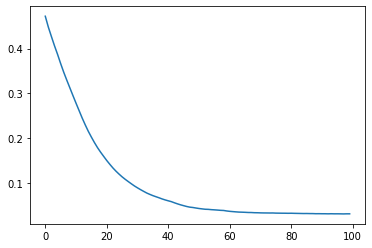

In [69]:
loss=results.history['loss'] #訓練データ誤差
val_loss=results.history['val_loss'] #テストデータに対する誤差
plt.plot(range(epochs),loss)

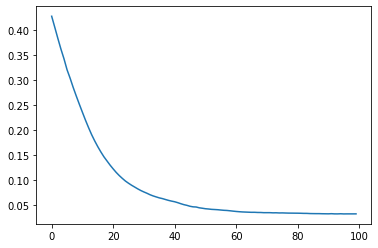

In [70]:
plt.plot(range(epochs),val_loss)
#classes

## データの構造を変えてみよう


((184, 2), (184,), (61, 2))

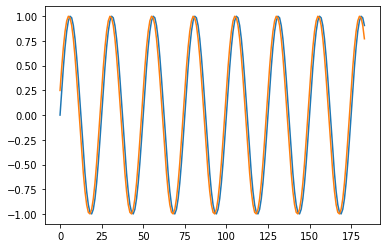

In [149]:
tsd_data=tsd.iloc[:-1]
tsd_target=tsd.iloc[1:]
X_train, X_test, y_train, y_test = train_test_split(tsd_data.values, tsd_target.values,shuffle=False)

# データ構造の変更
length=2
## 訓練データ
xx=[]
for x in range(length,len(X_train)):
    y=X_train[x-length:x]
    xx.append(y[:])
X_train=np.array(xx)
y_train=y_train[length:]
plt.plot(X_train)
## テストデータ
xx=[]
for x in range(length,len(X_test)):
    y=X_test[x-length:x]
    xx.append(y[:])
X_test=np.array(xx)
y_test=y_test[length:]
X_train.shape,y_train.shape,X_test.shape

In [150]:
np.random.seed(0)  # 乱数シード

'''
モデル設定
    入力データの次元を変更
    ユニットの数を変更
'''
model = Sequential([
    Dense(input_dim=length, units=1,activation='linear'), 
    #Dense(units=1,activation='linear')
])

model.compile(loss='mse', optimizer='rmsprop')

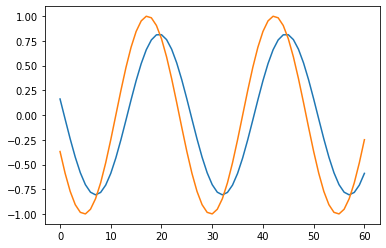

In [151]:
'''
モデル学習
'''
epochs=100
results=model.fit(X_train, y_train, epochs=epochs, batch_size=10,verbose=0, validation_data=(X_test, y_test))  # Keras 1

'''
学習結果の確認
'''
classes = model.predict(X_test, batch_size=1)
plt.plot(classes)
plt.plot(y_test)
#plt.plot(X_test)

In [152]:
y_train0=y_train[:-1]
y_train00=y_train[1:]
y_test0=y_test[:-1]
y_test00=y_test[1:]
X_hat_train = model.predict(X_train, batch_size=1)
print(mean_squared_error(y_train0, y_train00, multioutput='raw_values'))
print(mean_squared_error(X_hat_train, y_train, multioutput='raw_values'))
print(mean_squared_error(y_test0, y_test00, multioutput='raw_values'))
print(mean_squared_error(classes, y_test, multioutput='raw_values'))


[0.03083608]
[0.14490021]
[0.03018902]
[0.14550659]


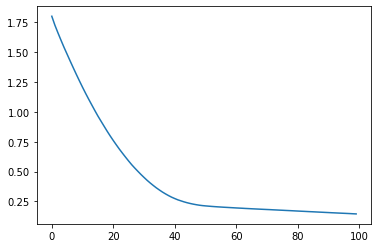

In [153]:
loss=results.history['loss']
val_loss=results.history['val_loss']
plt.plot(range(epochs),loss)

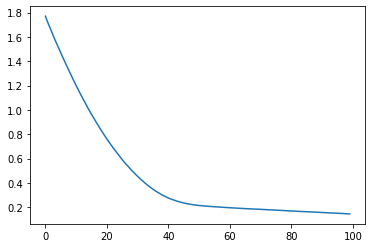

In [154]:
plt.plot(range(epochs),val_loss)
#classes

# ランダムウォーク

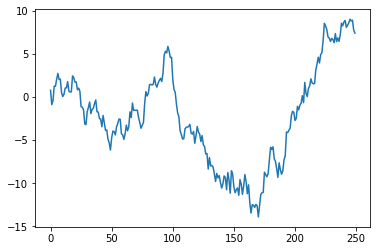

In [163]:
def randwalk(n=250):#k:
    epsilon=np.random.randn(n)
    return (np.cumsum(epsilon))
tsd=pd.Series(randwalk())
plt.plot(tsd)

In [164]:
# 入力特徴量の作成
tsd_data=tsd.iloc[:-1]
# 出力特徴量の作成　
tsd_target=tsd.iloc[1:]
print(tsd_data[:5])
print(tsd_target[:5])
# データがずれているのを確認


0    0.772695
1   -0.888903
2   -0.440708
3    1.255473
4    1.240616
dtype: float64
1   -0.888903
2   -0.440708
3    1.255473
4    1.240616
5    2.062022
dtype: float64


In [165]:
# 訓練データとテストデータの作成

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tsd_data.values, tsd_target.values,shuffle=False)

((186, 1), (186, 1), (63, 1), (63, 1))

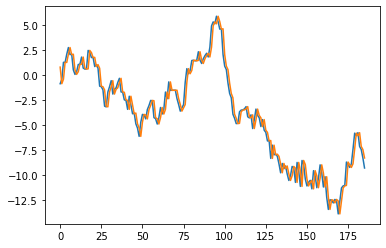

In [166]:
X_train=X_train[:,np.newaxis]
y_train=y_train[:,np.newaxis]
X_test=X_test[:,np.newaxis]
y_test=y_test[:,np.newaxis]
plt.plot(y_train)
plt.plot(X_train)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

In [167]:
# データの構造の確認
print("訓練データ　X")
print(X_train[:5])
print("テストデータ　y")
print(y_train[:5])

訓練データ　X
[[ 0.77269484]
 [-0.88890345]
 [-0.44070817]
 [ 1.2554734 ]
 [ 1.2406157 ]]
テストデータ　y
[[-0.88890345]
 [-0.44070817]
 [ 1.2554734 ]
 [ 1.2406157 ]
 [ 2.06202164]]


In [168]:
np.random.seed(0)  # 乱数シード

'''
モデル設定
'''
model = Sequential([
    Dense(input_dim=1, units=1,activation='linear'),  
    #Dense(units=2,activation='relu'),  
    #Dense(units=1,activation='linear')  # 出力層の活性化関数は恒等関数(linear)
])

model.compile(loss='mse', optimizer='rmsprop')
epochs=100

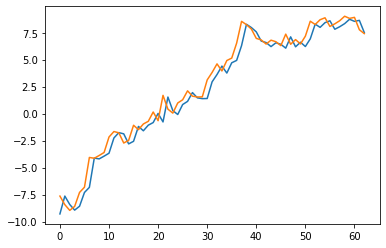

In [170]:
'''
モデル学習
'''
epochs=1000
results=model.fit(X_train, y_train, epochs=epochs, batch_size=10,verbose=0, validation_data=(X_test, y_test))  # Keras 1

'''
学習結果の確認
'''
classes = model.predict(X_test, batch_size=1)
plt.plot(classes)
plt.plot(y_test)
#plt.plot(X_test)

In [171]:
y_train0=y_train[:-1]
y_train00=y_train[1:]
y_test0=y_test[:-1]
y_test00=y_test[1:]
X_hat_train = model.predict(X_train, batch_size=1)
print(mean_squared_error(y_train0, y_train00, multioutput='raw_values'))
print(mean_squared_error(X_hat_train, y_train, multioutput='raw_values'))
print(mean_squared_error(y_test0, y_test00, multioutput='raw_values'))
print(mean_squared_error(classes, y_test, multioutput='raw_values'))


[0.8760453]
[0.87540255]
[0.75918056]
[0.87428581]


In [174]:
np.random.seed(0)  # 乱数シード

'''
モデル設定
'''
model = Sequential([
    Dense(input_dim=1, units=1,activation='linear'),  
    Dense(units=2,activation='relu'),  
    Dense(units=1,activation='linear')  # 出力層の活性化関数は恒等関数(linear)
])

model.compile(loss='mse', optimizer='rmsprop')
epochs=100

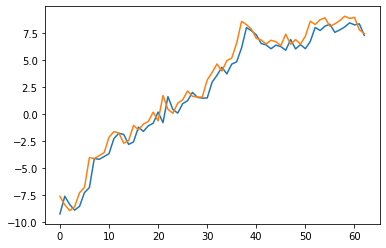

In [175]:
'''
モデル学習
'''
epochs=1000
results=model.fit(X_train, y_train, epochs=epochs, batch_size=10,verbose=0, validation_data=(X_test, y_test))  # Keras 1

'''
学習結果の確認
'''
classes = model.predict(X_test, batch_size=1)
plt.plot(classes)
plt.plot(y_test)
#plt.plot(X_test)

In [176]:
y_train0=y_train[:-1]
y_train00=y_train[1:]
y_test0=y_test[:-1]
y_test00=y_test[1:]
X_hat_train = model.predict(X_train, batch_size=1)
print(mean_squared_error(y_train0, y_train00, multioutput='raw_values'))
print(mean_squared_error(X_hat_train, y_train, multioutput='raw_values'))
print(mean_squared_error(y_test0, y_test00, multioutput='raw_values'))
print(mean_squared_error(classes, y_test, multioutput='raw_values'))


[0.8760453]
[0.87198062]
[0.75918056]
[0.96917621]
